<a href="https://colab.research.google.com/github/JinkyoHan/JinkyoHan/blob/main/WaveSpectra_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input File은 다음과 같은 포맷으로 정리되어 있어야 합니다.
- Column: Mean Period [sec]
- Row : Significant Wave Height [m]


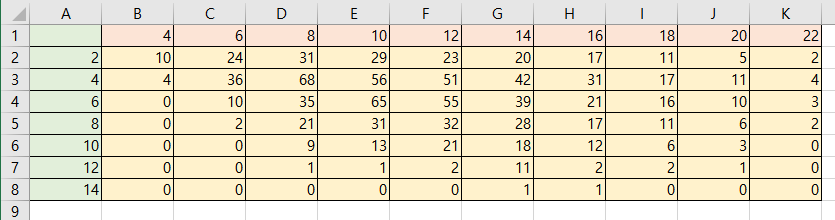

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# 각 column은 T_mean, row는 H_s여야 함
df = pd.read_excel("HW4_P1_table.xlsx", index_col=0)
print(df)

    4   6   8   10  12  14  16  18  20  22
2   10  24  31  29  23  20  17  11   5   2
4    4  36  68  56  51  42  31  17  11   4
6    0  10  35  65  55  39  21  16  10   3
8    0   2  21  31  32  28  17  11   6   2
10   0   0   9  13  21  18  12   6   3   0
12   0   0   1   1   2  11   2   2   1   0
14   0   0   0   0   0   1   1   0   0   0


# get_T_mean
- 전체 평균 파 주기를 계산합니다.

# calculate_Prob
- 주어진 M_in_year에 대응되는 확률을 계산합니다.

# Q
- 특정 H가 발생할 확률을 계산합니다.

# find_H
- M_in_year에 대응되는 확률과 같은 확률을 가지는 H를 찾습니다.

In [3]:
def get_T_mean(df):
    weighted_sum = sum(df.columns * df.sum(axis=0))
    total_frequency = df.sum().sum()
    T = weighted_sum / total_frequency
    return T

def calculate_Prob(df, M_in_year):
    return get_T_mean(df) / (365 * 24 * 3600 * M_in_year)

def Q(df, H):
    tot = df.sum().sum()
    result = 0
    for i in df.index:
        result += (df.sum(axis=1)[i]/tot)*np.exp(-2*((H/i)**2))
    return result

def find_H(df, M):
    # 차이를 최소화하는 함수
    def objective(H):
        return abs(calculate_Prob(df, M) - Q(df, H))

    # 초기 H 값 (문제에 따라 조정 가능)
    initial_H = 1

    # 최적화 실행
    result = minimize(objective, initial_H, method='Nelder-Mead')

    if result.success:
        return result.x[0]
    else:
        raise Exception("Optimization failed")

# find_H(df, M)을 이용한 M년파의 파고 예측

In [6]:
find_H(df, 10)

32.90507812500007